<a href="https://colab.research.google.com/github/jtruyu/Admision-UNI-2024-1/blob/main/Deserci%C3%B3n%20alumnos%20educaci%C3%B3n%20superior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

#Construcción de datos necesarios para la aplicación de los modelos

In [ ]:
fechaActual = datetime.datetime.today()

In [ ]:
df = pd.read_excel ('Datos_Tesis_Data_Science.xlsx')

In [ ]:
df_modelo=df[['COD_SECCION','FECHA_MATRICULA','POND_ACUMULADO','SEXO','FECHA_NACIMIENTO','CICLO_ALUMNO','2022-I','EGRESADO','COD_FACULTAD','DES_ESTADO_MAT','SEDE','ID_GRUPO','COD_RELACION']]

In [ ]:
df_modelo['MES_MATRICULA']= df_modelo['FECHA_MATRICULA'].dt.month
df_modelo['EDAD']=fechaActual.year - pd.to_datetime(df_modelo['FECHA_NACIMIENTO']).dt.year
df_modelo['ANIO_ESTUDIO']= fechaActual.year - pd.to_datetime(df_modelo['FECHA_MATRICULA']).dt.year
df_modelo['CARERRA']=df_modelo['ID_GRUPO']
df_modelo['RELACION_FACULTAD_CICLO']= df_modelo['COD_RELACION']

<ipython-input-5-1d33b603fdec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['MES_MATRICULA']= df_modelo['FECHA_MATRICULA'].dt.month
<ipython-input-5-1d33b603fdec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['EDAD']=fechaActual.year - pd.to_datetime(df_modelo['FECHA_NACIMIENTO']).dt.year
<ipython-input-5-1d33b603fdec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
df_modelo=df_modelo.drop(['FECHA_MATRICULA','FECHA_NACIMIENTO','ID_GRUPO','COD_RELACION'],axis=1)

In [ ]:
df_modelo = df_modelo.drop(df_modelo[df_modelo['EDAD']>100].index)

In [ ]:
df_modelo=df_modelo[df_modelo['CICLO_ALUMNO']==1]

In [ ]:
df_modelo.reset_index()

,index,COD_SECCION,POND_ACUMULADO,SEXO,CICLO_ALUMNO,2022-I,EGRESADO,COD_FACULTAD,DES_ESTADO_MAT,SEDE,MES_MATRICULA,EDAD,ANIO_ESTUDIO,CARERRA,RELACION_FACULTAD_CICLO
0,34,A1AF,16.80,M,1,CONTINUADOR,-,1,MATRICULA REGULAR,AREQUIPA,8,21,3,1,11
1,35,A1AF,5.35,F,1,CONTINUADOR,-,1,MATRICULA REGULAR,AREQUIPA,8,20,3,1,11
2,314,G1AG,3.67,F,1,DESERTOR,-,2,MATRICULA REGULAR,BELLAVISTA,8,23,3,6,21
3,317,G1AG,0.00,F,1,DESERTOR,-,2,RETIRO TEMPORAL,BELLAVISTA,8,23,3,6,21
4,319,G1AG,7.59,M,1,CONTINUADOR,-,2,MATRICULA REGULAR,BELLAVISTA,8,22,3,6,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,17741,M1AB,17.60,M,1,CONTINUADOR,-,2,MATRICULA REGULAR,MIRAFLORES,8,26,3,712,21
5052,17742,M1AB,17.57,M,1,CONTINUADOR,-,2,MATRICULA REGULAR,MIRAFLORES,8,22,3,709,21
5053,17743,M1CB,0.00,M,1,DESERTOR,-,1,RETIRO TEMPORAL,MIRAFLORES,8,20,3,718,11
5054,17744,M1CB,17.50,M,1,CONTINUADOR,-,1,MATRICULA REGULAR,MIRAFLORES,8,22,3,718,11


In [ ]:
df_modelo["ID"]=df_modelo.index+1

In [ ]:
df_modelo['EGRESADO']=df_modelo['EGRESADO'].replace('-','')

In [ ]:
data=df_modelo.copy()

In [ ]:
data["Churn"]=data["2022-I"].replace(["DESERTOR","CONTINUADOR"], [1,0])

<ipython-input-13-ae84d848a6f4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Churn"]=data["2022-I"].replace(["DESERTOR","CONTINUADOR"], [1,0])


In [ ]:
data["SEXO"]=data["SEXO"].replace(["M","F"],[0,1])

<ipython-input-14-b940048d1873>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["SEXO"]=data["SEXO"].replace(["M","F"],[0,1])


In [ ]:
data.head(5)

,COD_SECCION,POND_ACUMULADO,SEXO,CICLO_ALUMNO,2022-I,EGRESADO,COD_FACULTAD,DES_ESTADO_MAT,SEDE,MES_MATRICULA,EDAD,ANIO_ESTUDIO,CARERRA,RELACION_FACULTAD_CICLO,ID,Churn
34,A1AF,16.80,0,1,CONTINUADOR,,1,MATRICULA REGULAR,AREQUIPA,8,21,3,1,11,35,0
35,A1AF,5.35,1,1,CONTINUADOR,,1,MATRICULA REGULAR,AREQUIPA,8,20,3,1,11,36,0
314,G1AG,3.67,1,1,DESERTOR,,2,MATRICULA REGULAR,BELLAVISTA,8,23,3,6,21,315,1
317,G1AG,0.00,1,1,DESERTOR,,2,RETIRO TEMPORAL,BELLAVISTA,8,23,3,6,21,318,1
319,G1AG,7.59,0,1,CONTINUADOR,,2,MATRICULA REGULAR,BELLAVISTA,8,22,3,6,21,320,0


#Preparación de datos para los modelos

In [ ]:
X = data.drop(["COD_SECCION",'Churn',"2022-I","EGRESADO","DES_ESTADO_MAT","SEDE","CARERRA","RELACION_FACULTAD_CICLO","ID"], axis=1) # Eliminamos la columna 'churn' para obtener las características
y = data['Churn'] # Obtenemos la columna 'churn' como nuestra variable objetivo

In [ ]:
X

,POND_ACUMULADO,SEXO,CICLO_ALUMNO,COD_FACULTAD,MES_MATRICULA,EDAD,ANIO_ESTUDIO
34,16.80,0,1,1,8,21,3
35,5.35,1,1,1,8,20,3
314,3.67,1,1,2,8,23,3
317,0.00,1,1,2,8,23,3
319,7.59,0,1,2,8,22,3
...,...,...,...,...,...,...,...
17741,17.60,0,1,2,8,26,3
17742,17.57,0,1,2,8,22,3
17743,0.00,0,1,1,8,20,3
17744,17.50,0,1,1,8,22,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.4 MB/s eta 0:00:00


In [ ]:
import mglearn

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


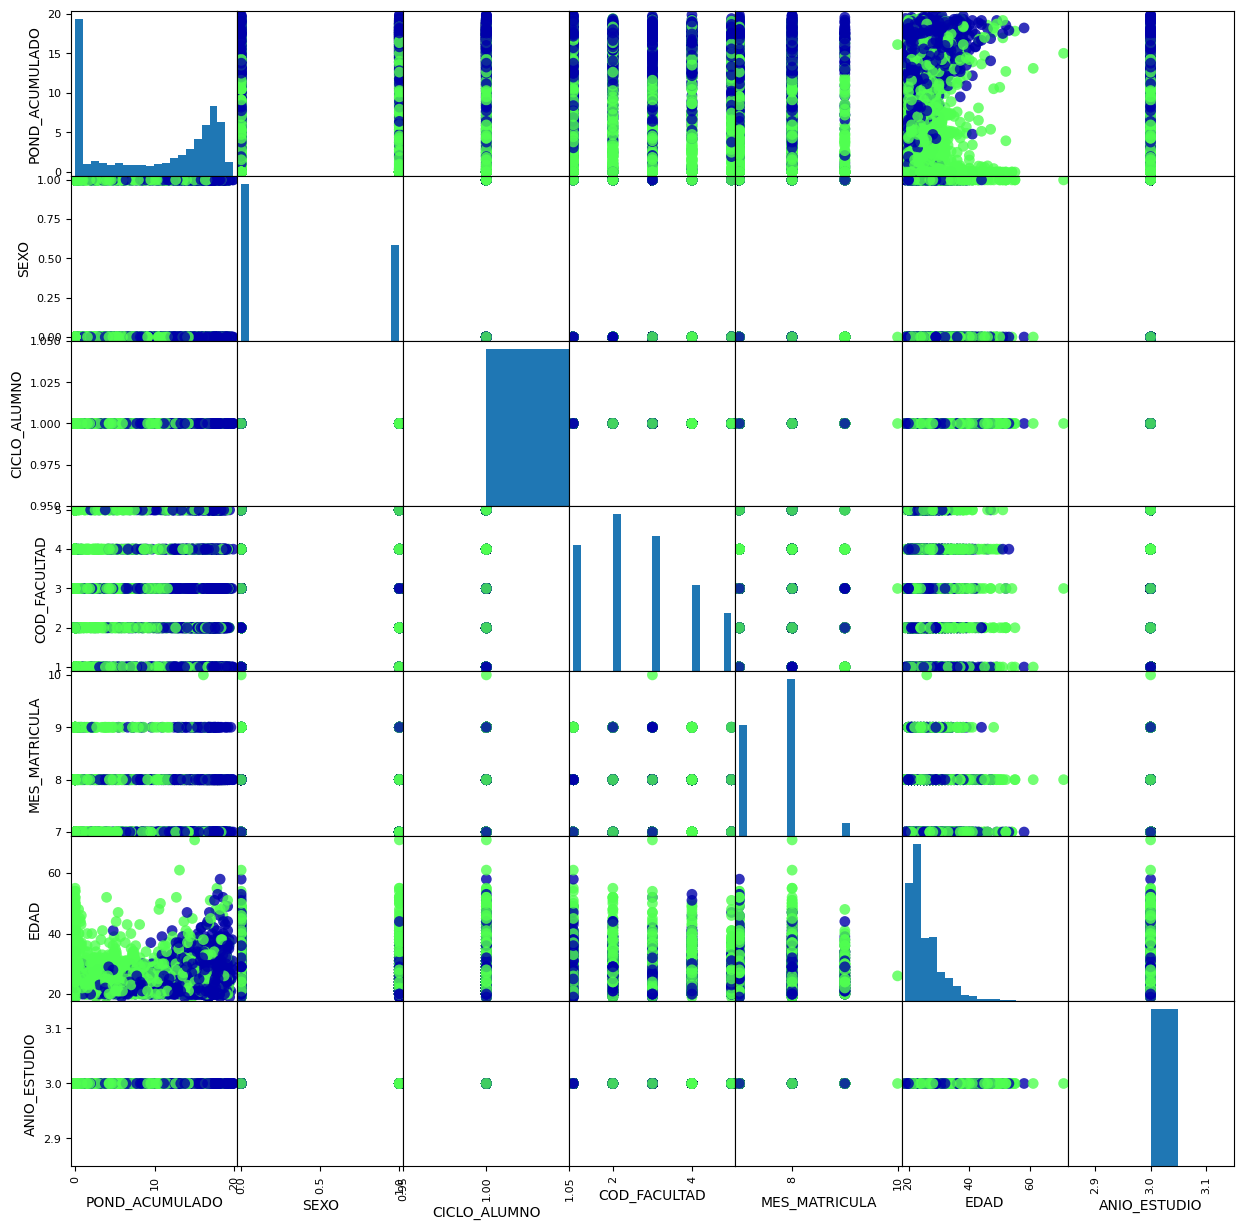

In [ ]:
grr = pd.plotting.scatter_matrix(X_train, c=y_train, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

##1) Random Forest

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluación del rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Informe de clasificación
print("Informe de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)

Precisión del modelo: 76.19%
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       481
           1       0.77      0.77      0.77       531

    accuracy                           0.76      1012
   macro avg       0.76      0.76      0.76      1012
weighted avg       0.76      0.76      0.76      1012

Matriz de confusión:
 [[361 120]
 [121 410]]


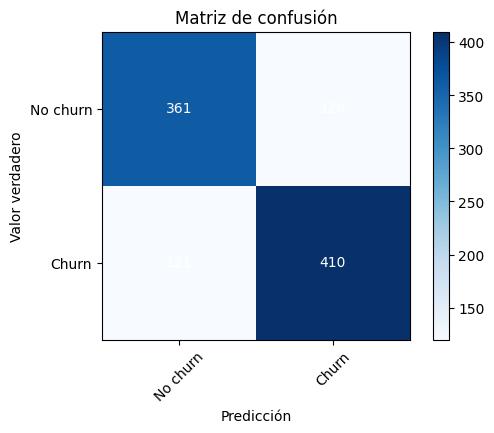

In [ ]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Matriz de confusión")
plt.colorbar()

classes = ['No churn', 'Churn']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')

plt.xlabel('Predicción')
plt.ylabel('Valor verdadero')
plt.show()

Importancia de variables

In [ ]:
feature_importance = model.feature_importances_

# Imprimir la importancia de cada variable
for i, importance in enumerate(feature_importance):
    print(f'Variable {i}: {importance}')

Variable 0: 0.7662606202123192
Variable 1: 0.012458364155945215
Variable 2: 0.0
Variable 3: 0.050616969091270406
Variable 4: 0.0256980268757462
Variable 5: 0.14496601966471898
Variable 6: 0.0


##2) Regresión Logística

In [ ]:
# Modelo de Regresión Logística
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Evaluación del modelo de Regresión Logística
y_pred_logreg = logreg_model.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Precisión del modelo de Regresión Logística: {:.2f}%".format(accuracy_logreg * 100))
print("Informe de clasificación para el modelo de Regresión Logística:\n", classification_report(y_test, y_pred_logreg))
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Matriz de confusión:\n", conf_matrix_logreg)

Precisión del modelo de Regresión Logística: 79.35%
Informe de clasificación para el modelo de Regresión Logística:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       481
           1       0.82      0.78      0.80       531

    accuracy                           0.79      1012
   macro avg       0.79      0.79      0.79      1012
weighted avg       0.79      0.79      0.79      1012

Matriz de confusión:
 [[389  92]
 [117 414]]


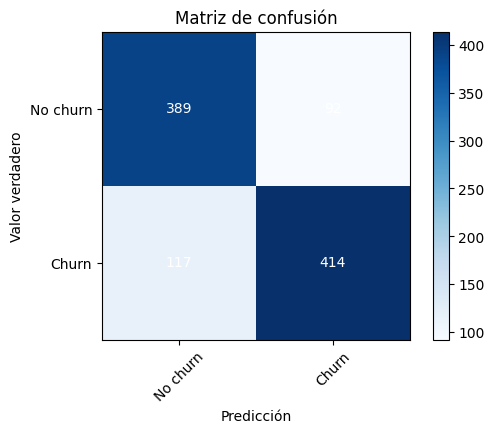

In [ ]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix_logreg, cmap='Blues', interpolation='nearest')
plt.title("Matriz de confusión")
plt.colorbar()

classes = ['No churn', 'Churn']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix_logreg[i, j]), ha='center', va='center', color='white')

plt.xlabel('Predicción')
plt.ylabel('Valor verdadero')
plt.show()

Importancia de variables

In [ ]:
feature_importance = logreg_model.coef_[0]  # Coeficientes de las variables

# Imprimir la importancia de cada variable
for i, importance in enumerate(feature_importance):
    print(f'Variable {i}: {importance}')

Variable 0: -1.8473327332063314
Variable 1: 0.04808357450329477
Variable 2: 0.0
Variable 3: -0.012058090231818117
Variable 4: -0.10002523666394236
Variable 5: 0.48785335708785044
Variable 6: 0.0


##3) Árboles de decisión

In [ ]:
# Modelo de Árboles de Decisión
dt_model = DecisionTreeClassifier(max_depth= 4,random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Evaluación del modelo de Árboles de Decisión
y_pred_dt = dt_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Precisión del modelo de Árboles de Decisión: {:.2f}%".format(accuracy_dt * 100))
print("Informe de clasificación para el modelo de Árboles de Decisión:\n", classification_report(y_test, y_pred_dt))
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Matriz de confusión:\n", conf_matrix_dt)

Precisión del modelo de Árboles de Decisión: 79.94%
Informe de clasificación para el modelo de Árboles de Decisión:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       481
           1       0.84      0.76      0.80       531

    accuracy                           0.80      1012
   macro avg       0.80      0.80      0.80      1012
weighted avg       0.80      0.80      0.80      1012

Matriz de confusión:
 [[406  75]
 [128 403]]


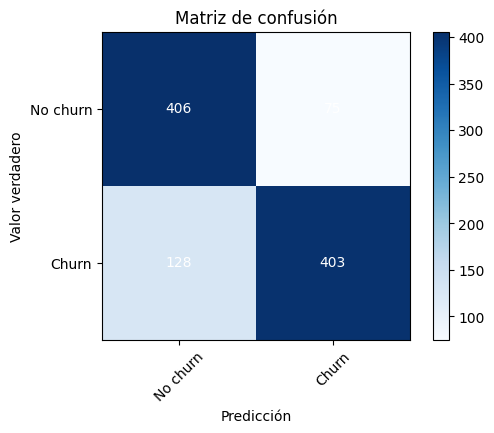

In [ ]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix_dt, cmap='Blues', interpolation='nearest')
plt.title("Matriz de confusión")
plt.colorbar()

classes = ['No churn', 'Churn']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix_dt[i, j]), ha='center', va='center', color='white')

plt.xlabel('Predicción')
plt.ylabel('Valor verdadero')
plt.show()

Importancia de variables

In [ ]:
feature_importance = dt_model.feature_importances_

# Imprimir la importancia de cada variable
for i, importance in enumerate(feature_importance):
    print(f'Variable {i}: {importance}')

Variable 0: 0.959021965231064
Variable 1: 0.0
Variable 2: 0.0
Variable 3: 0.0
Variable 4: 0.0
Variable 5: 0.04097803476893602
Variable 6: 0.0


##4) Support vector machine

In [ ]:
# Modelo SVM
svm_model = SVC(kernel='linear', probability=True,random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Evaluación del modelo SVM
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Precisión del modelo SVM: {:.2f}%".format(accuracy_svm * 100))
print("Informe de clasificación para el modelo SVM:\n", classification_report(y_test, y_pred_svm))
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Matriz de confusión:\n", conf_matrix_svm)

Precisión del modelo SVM: 79.94%
Informe de clasificación para el modelo SVM:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       481
           1       0.85      0.76      0.80       531

    accuracy                           0.80      1012
   macro avg       0.80      0.80      0.80      1012
weighted avg       0.80      0.80      0.80      1012

Matriz de confusión:
 [[408  73]
 [130 401]]


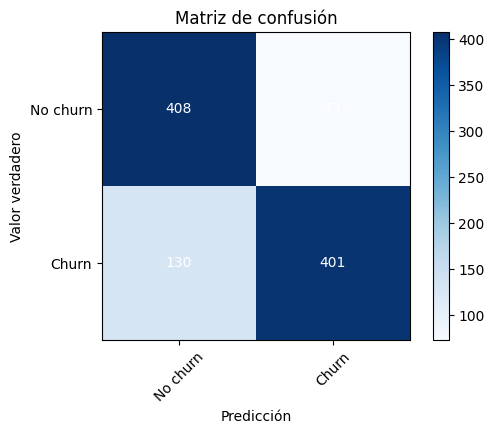

In [ ]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix_svm, cmap='Blues', interpolation='nearest')
plt.title("Matriz de confusión")
plt.colorbar()

classes = ['No churn', 'Churn']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix_svm[i, j]), ha='center', va='center', color='white')

plt.xlabel('Predicción')
plt.ylabel('Valor verdadero')
plt.show()

Importancia de varibles

In [ ]:
feature_importance = svm_model.coef_[0]  # Coeficientes de las variables

# Imprimir la importancia de cada variable
for i, importance in enumerate(feature_importance):
    print(f'Variable {i}: {importance}')

Variable 0: -1.1960677507740203
Variable 1: 0.03821073362011851
Variable 2: 0.0
Variable 3: -0.012309464234582346
Variable 4: -0.0310033971958954
Variable 5: 0.20668884726347808
Variable 6: 0.0


##5) Gradient Boosting

In [ ]:
# Modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Evaluación del modelo de Gradient Boosting
y_pred_gb = gb_model.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Precisión del modelo de Gradient Boosting: {:.2f}%".format(accuracy_gb * 100))
print("Informe de clasificación para el modelo de Gradient Boosting:\n", classification_report(y_test, y_pred_gb))
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Matriz de confusión:\n", conf_matrix_gb)

Precisión del modelo de Gradient Boosting: 80.63%
Informe de clasificación para el modelo de Gradient Boosting:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       481
           1       0.84      0.78      0.81       531

    accuracy                           0.81      1012
   macro avg       0.81      0.81      0.81      1012
weighted avg       0.81      0.81      0.81      1012

Matriz de confusión:
 [[400  81]
 [115 416]]


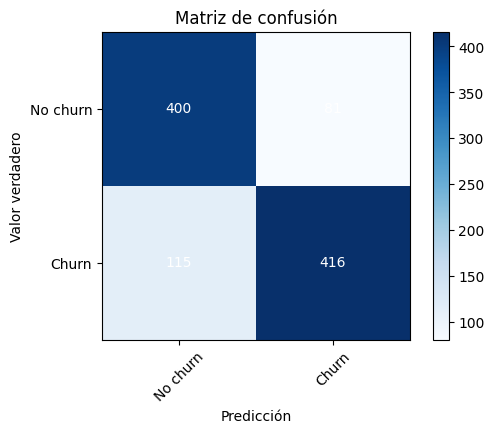

In [ ]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix_gb, cmap='Blues', interpolation='nearest')
plt.title("Matriz de confusión")
plt.colorbar()

classes = ['No churn', 'Churn']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix_gb[i, j]), ha='center', va='center', color='white')

plt.xlabel('Predicción')
plt.ylabel('Valor verdadero')
plt.show()

##6) Redes neuronales

In [ ]:
# Modelo de Redes Neuronales
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_scaled, y_train)

# Evaluación del modelo de Redes Neuronales
y_pred_nn = nn_model.predict(X_test_scaled)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Precisión del modelo de Redes Neuronales: {:.2f}%".format(accuracy_nn * 100))
print("Informe de clasificación para el modelo de Redes Neuronales:\n", classification_report(y_test, y_pred_nn))
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print("Matriz de confusión:\n", conf_matrix_nn)

Precisión del modelo de Redes Neuronales: 79.74%
Informe de clasificación para el modelo de Redes Neuronales:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       481
           1       0.83      0.77      0.80       531

    accuracy                           0.80      1012
   macro avg       0.80      0.80      0.80      1012
weighted avg       0.80      0.80      0.80      1012

Matriz de confusión:
 [[398  83]
 [122 409]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


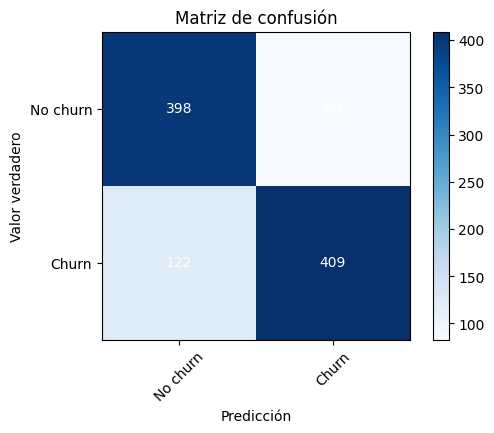

In [ ]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix_nn, cmap='Blues', interpolation='nearest')
plt.title("Matriz de confusión")
plt.colorbar()

classes = ['No churn', 'Churn']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix_nn[i, j]), ha='center', va='center', color='white')

plt.xlabel('Predicción')
plt.ylabel('Valor verdadero')
plt.show()

##Optimización de parámetros

In [ ]:
def print_results(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión del modelo {model_name}: {accuracy:.2f}%")
    print("Informe de clasificación:")
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Matriz de confusión:")
    print(conf_matrix)
    return accuracy, conf_matrix

In [ ]:
print("Modelos iniciales sin optimización de hiperparámetros:")
model_names = ['Random Forest', 'Gradient Boosting', 'Redes Neuronales', 'Support Vector Machines', 'Regresión Logística','Decision Tree Classifier']
models = [RandomForestClassifier(random_state=42),
          GradientBoostingClassifier(random_state=42),
          MLPClassifier(random_state=42),
          SVC(random_state=42),
          LogisticRegression(random_state=42),
          DecisionTreeClassifier(random_state=42)]

Modelos iniciales sin optimización de hiperparámetros:


In [ ]:
initial_accuracies = []
initial_conf_matrices = []

In [ ]:
for model_name, model in zip(model_names, models):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Resultados para el modelo {model_name} antes de la optimización:")
    acc, conf_matrix = print_results(model_name, y_test, y_pred)
    initial_accuracies.append(acc)
    initial_conf_matrices.append(conf_matrix)

Resultados para el modelo Random Forest antes de la optimización:
Precisión del modelo Random Forest: 0.76%
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       481
           1       0.77      0.77      0.77       531

    accuracy                           0.76      1012
   macro avg       0.76      0.76      0.76      1012
weighted avg       0.76      0.76      0.76      1012

Matriz de confusión:
[[361 120]
 [121 410]]
Resultados para el modelo Gradient Boosting antes de la optimización:
Precisión del modelo Gradient Boosting: 0.81%
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       481
           1       0.84      0.78      0.81       531

    accuracy                           0.81      1012
   macro avg       0.81      0.81      0.81      1012
weighted avg       0.81      0.81      0.81      1012

Matriz de confusión:
[[400

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Resultados para el modelo Redes Neuronales antes de la optimización:
Precisión del modelo Redes Neuronales: 0.80%
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       481
           1       0.83      0.77      0.80       531

    accuracy                           0.80      1012
   macro avg       0.80      0.80      0.80      1012
weighted avg       0.80      0.80      0.80      1012

Matriz de confusión:
[[398  83]
 [122 409]]
Resultados para el modelo Support Vector Machines antes de la optimización:
Precisión del modelo Support Vector Machines: 0.81%
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       481
           1       0.85      0.77      0.81       531

    accuracy                           0.81      1012
   macro avg       0.81      0.81      0.81      1012
weighted avg       0.81      0.81      0.81      1012

Matriz d

In [ ]:
# Optimización de hiperparámetros y comparación de resultados
print("\nOptimización de hiperparámetros y comparación de resultados:")
tuned_accuracies = []
tuned_conf_matrices = []

for model_name, model in zip(model_names, models):
    if model_name == 'Redes Neuronales':
        # Redes Neuronales requiere diferente sintaxis para optimización de hiperparámetros
        params = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
                  'activation': ['relu', 'logistic'],
                  'alpha': [0.0001, 0.001, 0.01]}

    elif model_name == 'Random Forest':
        params = {'n_estimators': [50, 100, 150],
                  'max_depth': [None, 10, 20],
                  'min_samples_split': [2, 5, 10]}

    elif model_name == 'Gradient Boosting':
        params = {'n_estimators': [50, 100, 150],
                  'learning_rate': [0.1, 0.01, 0.001],
                  'max_depth': [None, 3, 5]}

    elif model_name == 'Support Vector Machines':
        params = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf']}

    elif model_name == 'Regresión Logística':
        params = {'C': [0.1, 1, 10],
                  'penalty': ['l1', 'l2']}

    elif model_name == 'Decision Tree Classifier':
        params = {'max_depth': [None, 10, 20, 30],
                  'min_samples_split': [2, 5, 10]}

    grid_search = GridSearchCV(model, params, cv=5)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    y_pred_tuned = best_model.predict(X_test_scaled)

    print(f"Resultados para el modelo {model_name} después de la optimización:")
    acc, conf_matrix = print_results(model_name, y_test, y_pred_tuned)
    tuned_accuracies.append(acc)
    tuned_conf_matrices.append(conf_matrix)


Optimización de hiperparámetros y comparación de resultados:
Resultados para el modelo Random Forest después de la optimización:
Precisión del modelo Random Forest: 0.80%
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       481
           1       0.84      0.78      0.81       531

    accuracy                           0.80      1012
   macro avg       0.81      0.81      0.80      1012
weighted avg       0.81      0.80      0.80      1012

Matriz de confusión:
[[400  81]
 [117 414]]
Resultados para el modelo Gradient Boosting después de la optimización:
Precisión del modelo Gradient Boosting: 0.81%
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       481
           1       0.84      0.78      0.81       531

    accuracy                           0.81      1012
   macro avg       0.81      0.81      0.81      1012
weighted avg   

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Resultados para el modelo Redes Neuronales después de la optimización:
Precisión del modelo Redes Neuronales: 0.80%
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       481
           1       0.84      0.76      0.80       531

    accuracy                           0.80      1012
   macro avg       0.80      0.80      0.80      1012
weighted avg       0.80      0.80      0.80      1012

Matriz de confusión:
[[403  78]
 [126 405]]
Resultados para el modelo Support Vector Machines después de la optimización:
Precisión del modelo Support Vector Machines: 0.80%
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       481
           1       0.85      0.76      0.80       531

    accuracy                           0.80      1012
   macro avg       0.80      0.80      0.80      1012
weighted avg       0.80      0.80      0.80      1012

Matr

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       481
           1       0.82      0.78      0.80       531

    accuracy                           0.79      1012
   macro avg       0.79      0.79      0.79      1012
weighted avg       0.79      0.79      0.79      1012

Matriz de confusión:
[[389  92]
 [117 414]]
Resultados para el modelo Decision Tree Classifier después de la optimización:
Precisión del modelo Decision Tree Classifier: 0.75%
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       481
           1       0.81      0.68      0.74       531

    accuracy                           0.75      1012
   macro avg       0.76      0.75      0.75      1012
weighted avg       0.76      0.75      0.75      1012

Matriz de confusión:
[[396  85]
 [168 363]]


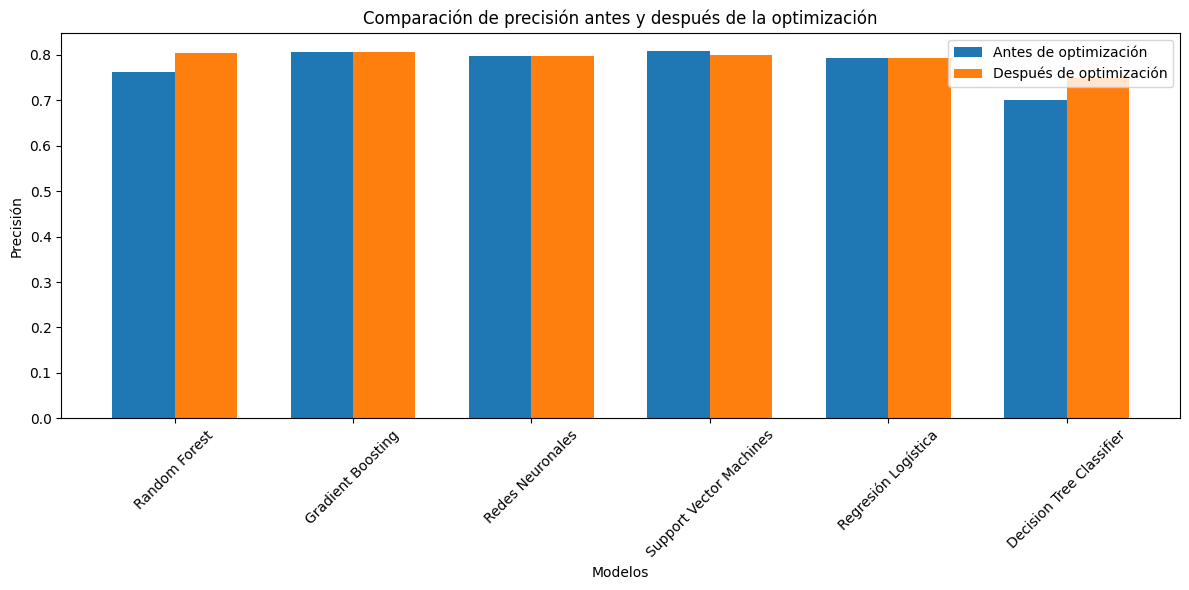

In [ ]:
# Gráficos comparativos de precisión antes y después de la optimización
fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(model_names))
bar_width = 0.35

rects1 = ax.bar(index, initial_accuracies, bar_width, label='Antes de optimización')
rects2 = ax.bar(index + bar_width, tuned_accuracies, bar_width, label='Después de optimización')

ax.set_xlabel('Modelos')
ax.set_ylabel('Precisión')
ax.set_title('Comparación de precisión antes y después de la optimización')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names,rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

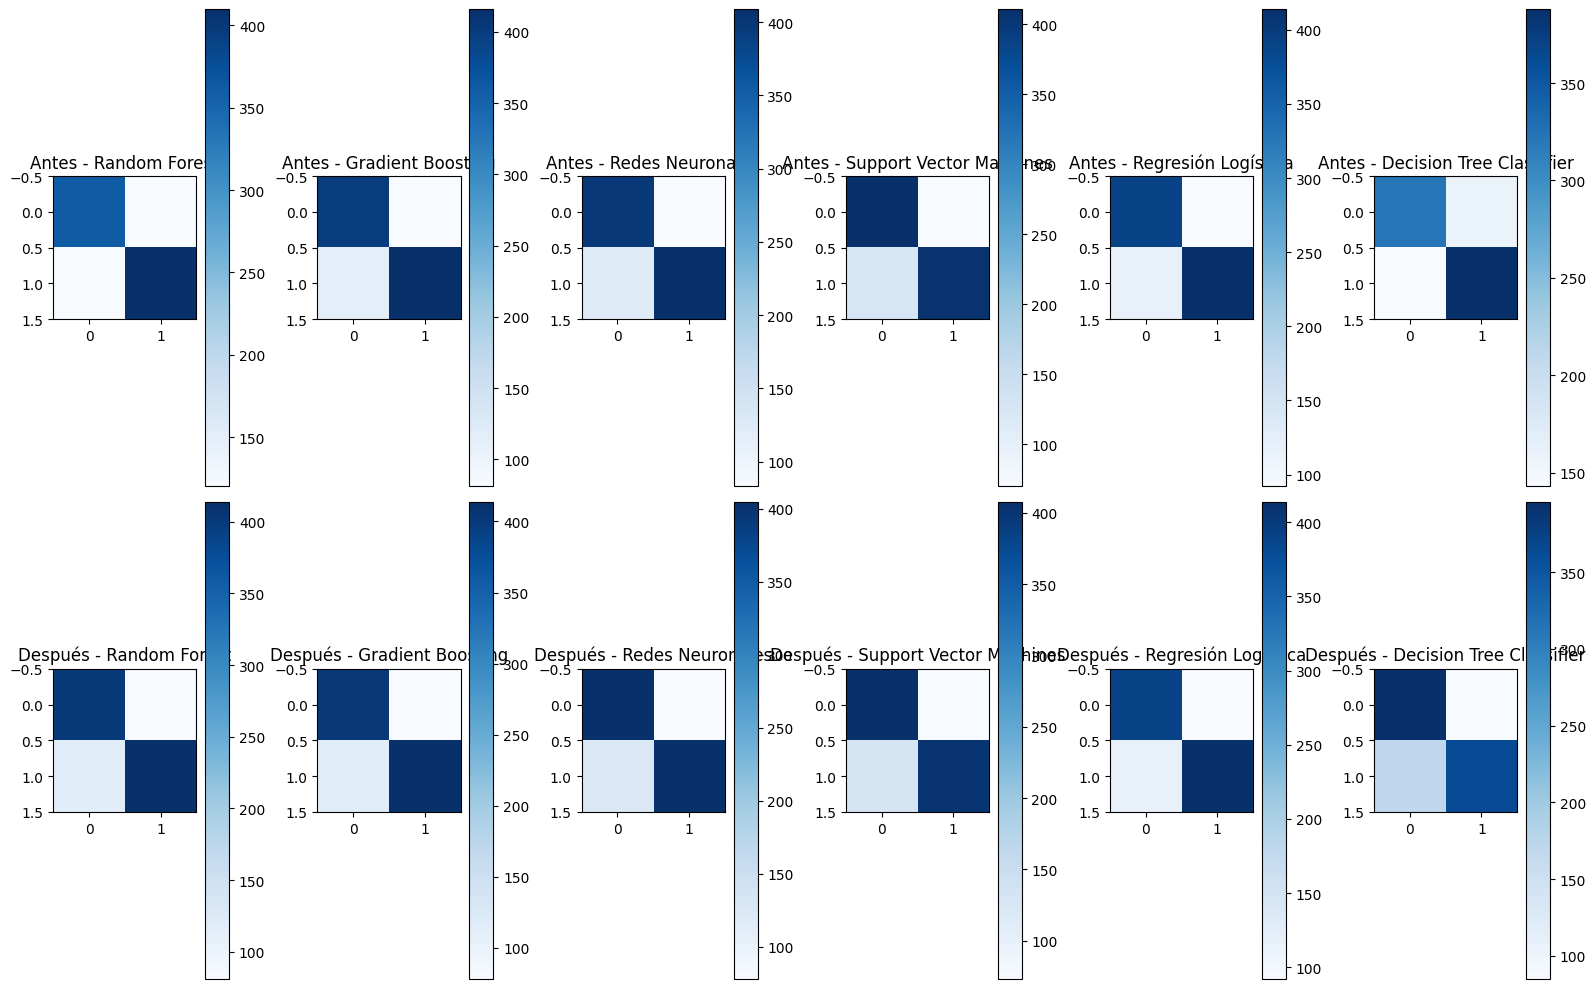

In [ ]:
# Gráficos comparativos de matrices de confusión antes y después de la optimización
plt.figure(figsize=(16, 10))
for i in range(6):
    plt.subplot(2, 6, i + 1)
    plt.imshow(initial_conf_matrices[i], cmap='Blues', interpolation='nearest')
    plt.title(f"Antes - {model_names[i]}")
    plt.colorbar()

    plt.subplot(2, 6, i + 7)
    plt.imshow(tuned_conf_matrices[i], cmap='Blues', interpolation='nearest')
    plt.title(f"Después - {model_names[i]}")
    plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Seleccionar el modelo SVM optimizado con GridSearchCV
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Aplicamos GridSearchCV para encontrar los mejores parámetros
grid_search_svm = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)

# Mejor estimador obtenido
best_svm = grid_search_svm.best_estimator_

# Evaluación con validación cruzada en los datos de entrenamiento
cv_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5)

# Evaluación en el conjunto de prueba
test_accuracy = best_svm.score(X_test_scaled, y_test)

# Resultados
print("Resultados de Validación Cruzada (conjunto de entrenamiento):")
print(f"Acuracias por fold: {cv_scores}")
print(f"Promedio de accuracia en validación cruzada: {cv_scores.mean():.4f}")

print("\nResultados en el conjunto de prueba:")
print(f"Accuracy en el conjunto de prueba: {test_accuracy:.4f}")

# Análisis de sobreajuste o subajuste
if test_accuracy > cv_scores.mean():
    print("\nEl modelo podría estar sobreajustado (mejor rendimiento en prueba que en validación cruzada).")
elif test_accuracy < cv_scores.mean():
    print("\nEl modelo podría estar subajustado (mejor rendimiento en validación cruzada que en prueba).")
else:
    print("\nEl modelo no muestra señales de sobreajuste ni subajuste (rendimientos consistentes).")

Resultados de Validación Cruzada (conjunto de entrenamiento):
Acuracias por fold: [0.80346106 0.82323857 0.81334981 0.80098888 0.81683168]
Promedio de accuracia en validación cruzada: 0.8116

Resultados en el conjunto de prueba:
Accuracy en el conjunto de prueba: 0.7994

El modelo podría estar subajustado (mejor rendimiento en validación cruzada que en prueba).


In [ ]:
# Definir parámetros de búsqueda más amplios para el SVM
params = {'C': [0.1, 1, 10, 100],  # Ajustar la penalización
          'kernel': ['linear', 'rbf', 'poly'],  # Probar más kernels
          'gamma': ['scale', 'auto', 0.1, 0.01, 1]}  # Probar diferentes valores de gamma

# GridSearchCV con validación cruzada
grid_search = GridSearchCV(SVC(random_state=42), params, cv=5, n_jobs=-1,verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Modelo optimizado
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_scaled)

print(f"Mejor modelo SVM: {grid_search.best_params_}")
print(f"Precisión en el conjunto de prueba: {best_model.score(X_test_scaled, y_test)}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Mejor modelo SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Precisión en el conjunto de prueba: 0.799407114624506


In [ ]:
# Realizar validación cruzada en el conjunto de entrenamiento
cross_val_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)

print(f"Acuracias por fold en validación cruzada: {cross_val_scores}")
print(f"Promedio de acuracia en validación cruzada: {cross_val_scores.mean()}")

Acuracias por fold en validación cruzada: [0.80346106 0.82323857 0.81334981 0.80098888 0.81683168]
Promedio de acuracia en validación cruzada: 0.8115740004161109
